<a href="https://colab.research.google.com/github/jotagectti/Natural-Language-Processing-PyTorch/blob/main/4_Performing_Multi_class_Text_Classification_Using_Characters(Full).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Language from Names

In [1]:
from io import open
import glob
import os

In [2]:
print(glob.glob('/content/data/names/*.txt'))

['/content/data/names/Greek.txt', '/content/data/names/Czech.txt', '/content/data/names/French.txt', '/content/data/names/Spanish.txt', '/content/data/names/Irish.txt', '/content/data/names/Italian.txt', '/content/data/names/Korean.txt', '/content/data/names/Arabic.txt', '/content/data/names/Polish.txt', '/content/data/names/Vietnamese.txt', '/content/data/names/Dutch.txt', '/content/data/names/English.txt', '/content/data/names/Russian.txt', '/content/data/names/Chinese.txt', '/content/data/names/Japanese.txt', '/content/data/names/German.txt', '/content/data/names/Scottish.txt', '/content/data/names/Portuguese.txt']


In [3]:
import unicodedata 
import string

all_letters = string.ascii_letters+" .,;'"
n_letters = len(all_letters)

all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [4]:
n_letters

57

In [5]:
language_names = {}
all_languages = []

In [6]:
def unicodeToAscii(s):
  return ''.join(
      c for c in unicodedata.normalize('NFD',s)
      if unicodedata.category(c) != 'Mn'
      and c in all_letters
  )

In [7]:
print(unicodeToAscii('Émile'))

Emile


In [10]:
def findFiles(path):
  return glob.glob(path)

In [11]:
total_names = 0

for filename in findFiles('/content/data/names/*.txt'):
  language = os.path.splitext(os.path.basename(filename))[0]
  all_languages.append(language)
  read_names = open(filename, encoding='utf-8').read().strip().split('\n')
  names= [unicodeToAscii(line) for line in read_names]
  language_names[language] = names
  total_names += len(names)

In [12]:
all_languages

['Greek',
 'Czech',
 'French',
 'Spanish',
 'Irish',
 'Italian',
 'Korean',
 'Arabic',
 'Polish',
 'Vietnamese',
 'Dutch',
 'English',
 'Russian',
 'Chinese',
 'Japanese',
 'German',
 'Scottish',
 'Portuguese']

In [13]:
n_languages = len(all_languages)
n_languages

18

In [14]:
total_names

20074

In [15]:
print(language_names['German'][:5])

['Abbing', 'Abel', 'Abeln', 'Abt', 'Achilles']


In [16]:
import torch

In [17]:
def letterToTensor(letter):
  tensor = torch.zeros(1,n_letters)
  tensor[0][all_letters.find(letter)] = 1

  return tensor

In [18]:

print(letterToTensor('a'))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [19]:
def nameToTensor(name):
  tensor = torch.zeros(len(name),1,n_letters)

  for li, letter in enumerate(name):
    tensor[li][0][all_letters.find(letter)] = 1
  
  return tensor

In [20]:

jorge_tensor = nameToTensor('Jorge')
jorge_tensor.size()

torch.Size([5, 1, 57])

In [22]:
jorge_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [23]:

import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
      return torch.zeros(1,self.hidden_size)

In [24]:

n_hidden = 256

rnn = RNN(n_letters, n_hidden, n_languages)

In [25]:
inp = letterToTensor('C')

hidden = torch.zeros(1,n_hidden)

output, next_hidden = rnn(inp,hidden)

print('output size: ', output.size())
print('next_hidden size: ', next_hidden.size())

output size:  torch.Size([1, 18])
next_hidden size:  torch.Size([1, 256])


In [26]:
inp = nameToTensor('Panchita')

hidden = torch.zeros(1,n_hidden)

output, next_hidden = rnn(inp[0],hidden)

In [27]:
print(output)

tensor([[-2.9255, -2.9409, -2.8736, -2.8861, -2.8885, -2.9032, -2.8978, -2.8913,
         -2.8759, -2.9003, -2.8932, -2.9603, -2.8847, -2.8768, -2.8227, -2.8745,
         -2.8766, -2.8625]], grad_fn=<LogSoftmaxBackward>)


In [28]:

def languageFromOutput(output):
  _, top_i = output.topk(1)
  language_i = top_i[0].item()
  return all_languages[language_i], language_i

In [29]:
print(languageFromOutput(output))

('Japanese', 14)


In [30]:
import random
def randomTrainingExample():
  random_language_index = random.randint(0,n_languages-1)
  language = all_languages[random_language_index]

  random_language_names = language_names[language]

  name = random_language_names[random.randint(0,len(random_language_names)-1)]

  language_tensor = torch.tensor([all_languages.index(language)], dtype=torch.long)
  name_tensor = nameToTensor(name)

  return language, name, language_tensor, name_tensor

In [31]:
for i in range(10):
  language, name, language_tensor, name_tensor = randomTrainingExample()
  print('language=', language, 'name = ',name)

language= English name =  Slocombe
language= Korean name =  San
language= Scottish name =  Gray
language= Greek name =  Tsahalis
language= Dutch name =  Michel
language= Czech name =  Koma
language= Italian name =  Nardo
language= Scottish name =  Hill
language= Italian name =  Orlando
language= Czech name =  Rypka


In [32]:
criterion = nn.NLLLoss()
learning_rate=0.005

In [33]:
def train(language_tensor, name_tensor):
  hidden = rnn.initHidden()

  rnn.zero_grad()

  for i in range(name_tensor.size()[0]):
    output, hidden = rnn(name_tensor[i], hidden)

  loss = criterion(output, language_tensor)
  loss.backward()

  for p in rnn.parameters():
    p.data.add_(-learning_rate, p.grad.data)

  return output, loss.item()

In [34]:
n_iters = 200000

current_loss = 0
all_losses = []

In [36]:
for epoch in range(1, n_iters +1):
  language, name, language_tensor, name_tensor = randomTrainingExample()

  output, loss = train(language_tensor, name_tensor)
  current_loss += loss
  
  if epoch % 5000 == 0:
    guess, guess_i = languageFromOutput(output)
    correct = '*PASS*' if guess == language else '*FAIL* (%s)' % language
    
    print('%d %d%% %.f %s / %s %s' % (epoch,epoch/n_iters*100,loss,name,guess,correct))
  
  if epoch % 1000 == 0:
    all_losses.append(current_loss / 1000)
    current_loss = 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:1025.)
  del sys.path[0]


5000 2% 3 Araya / Japanese *FAIL* (Spanish)
10000 5% 1 Hishida / Japanese *PASS*
15000 7% 1 Tahan / Arabic *PASS*
20000 10% 2 Romero / Portuguese *FAIL* (Spanish)
25000 12% 1 Dubhan / Irish *PASS*
30000 15% 2 Costa / Spanish *FAIL* (Portuguese)
35000 17% 2 Sula / Spanish *FAIL* (Czech)
40000 20% 1 Kuipers / Dutch *PASS*
45000 22% 1 Luc / Vietnamese *PASS*
50000 25% 1 Kuipers / Dutch *PASS*
55000 27% 0 Maslanka / Polish *PASS*
60000 30% 0 Motoyoshi / Japanese *PASS*
65000 32% 1 Kau / Chinese *PASS*
70000 35% 0 Kawagichi / Japanese *PASS*
75000 37% 2 Castell / Scottish *FAIL* (Spanish)
80000 40% 1 Roma / Spanish *PASS*
85000 42% 0 Reynder / Dutch *PASS*
90000 45% 1 Kong / Chinese *PASS*
95000 47% 1 Rothbauer / German *PASS*
100000 50% 1 Zavala / Spanish *PASS*
105000 52% 2 Murchadh / Scottish *FAIL* (Irish)
110000 55% 2 Chappell / Scottish *FAIL* (English)
115000 57% 0 Brezovjak / Czech *PASS*
120000 60% 2 De luca / Spanish *FAIL* (Italian)
125000 62% 1 Klerk / Czech *FAIL* (Dutch)
13000

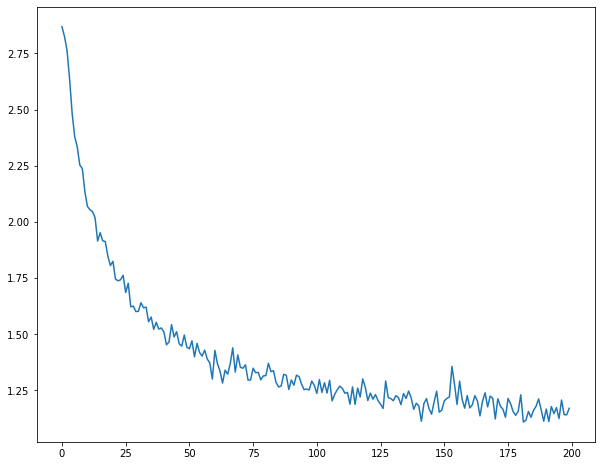

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(all_losses)
plt.show()

In [38]:
n_predictions = 3

In [40]:
input_name = 'Alejandro'

In [43]:
with torch.no_grad():
  
  name_tensor = nameToTensor(input_name)

  hidden = rnn.initHidden()
  for i in range(name_tensor.size()[0]):
    output,hidden = rnn(name_tensor[i], hidden)

  topv, topi = output.topk(n_predictions, 1, True)

  for i in range(n_predictions):
    value = topv[0][i].item()
    language_index = topi[0][i].item()

    print('(%.2f) %s' % (value, all_languages[language_index]))



(-0.95) Italian
(-0.97) Dutch
(-2.15) Spanish


In [44]:
input_name = 'Weon'

In [45]:
with torch.no_grad():
  
  name_tensor = nameToTensor(input_name)

  hidden = rnn.initHidden()
  for i in range(name_tensor.size()[0]):
    output,hidden = rnn(name_tensor[i], hidden)

  topv, topi = output.topk(n_predictions, 1, True)

  for i in range(n_predictions):
    value = topv[0][i].item()
    language_index = topi[0][i].item()

    print('(%.2f) %s' % (value, all_languages[language_index]))


(-0.51) Scottish
(-1.53) Korean
(-2.83) Chinese
